<div class="alert alert-info alert-info"><b><h1>EXERCICI 1</h1></b>
    
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
    
</div>

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info alert-info"><b><h1>Recopilación de datos</h1></b>

En un vistazo previo al fichero de datos, podemos ver que los datos no tienen encabezados, por lo que cargamos los datos y asignamos las columnas en el orden que vienen relacionadas en la descripción del dataset.
    
</div>

In [2]:
# Cargamos los datos del archivo en un Dataframe y asignamos nombre a las columnas.

df_housing = pd.read_csv('housing data.csv', header=None)
df_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<div class="alert alert-info alert-info"><b><h1>Limpieza de datos</h1></b>

Examinamos los datos en busca de errores, valores atípicos o faltantes.
    
</div>

In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Vemos los valores únicos de cada uno de los atributos
df_housing.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [6]:
df_housing.shape

(506, 14)

In [7]:
# Comprobamos si hay campos con valor núlo
df_housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#Comprobamos si hay campos con valor NaN
df_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df_housing.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [10]:
df_housing[['CHAS']].value_counts()

CHAS
0       471
1        35
dtype: int64

In [11]:
df_housing[['RAD']].value_counts()

RAD
24     132
5      115
4      110
3       38
6       26
2       24
8       24
1       20
7       17
dtype: int64

<div class="alert alert-info alert-info"><b><h1>Exploración de datos</h1></b>

Realizamos un análisis exploratorio de los datos para comprender su distribución, relaciones y características.   

</div>

<div class="alert alert-info alert-info">


  Información de los campos y descripción de los valores más carácterísticos:

  * **CRIM**: tasa de criminalidad per cápita por ciudad.
  * **ZN**: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
  * **INDUS**: proporción de acres de negocios no minoristas por ciudad.
  * **CHAS**: variable ficticia de Charles River (= 1 si la zona limita con el río; 0 en caso contrario).
  * **NOX**: concentración de óxidos nítricos (partes por 10 millones).
  * **RM**: número promedio de habitaciones por vivienda.
  * **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
  * **DIS**: distancias ponderadas a cinco centros de empleo en Boston.
  * **RAD**: índice de accesibilidad a autopistas radiales.
  * **TAX**: tasa de impuesto a la propiedad de valor total por cada 10,000 dólares.
  * **PTRATIO**: relación alumno-maestro por ciudad.
  * **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población afroamericana por ciudad.
  * **LSTAT**: % de estatus socioeconómico bajo de la población.
  * **MEDV**: valor mediano de viviendas ocupadas por sus propietarios en miles de dólares.
  
  Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo es la variable **MEDV**.
    
  </div>

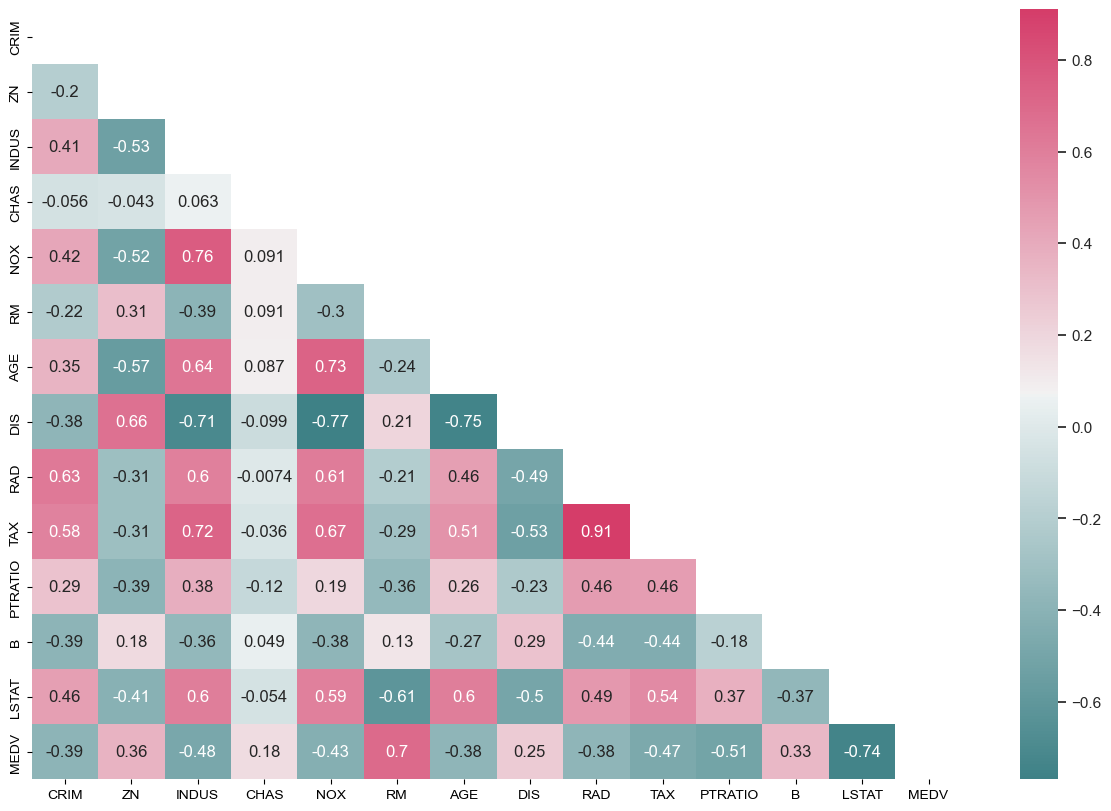

In [12]:
# Comprobamos mediante un heatmap las correlaciones entre las variables
fig, ax = plt.subplots(figsize=(15, 10))
corr = df_housing.corr()
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

<div class="alert alert-info alert-info">

  Tenemos una correlación positiva fuerte entre las variables **NOX**(concentración de óxidos nítricos-partes por 10 millones-) e **INDUS**(proporción de acres de negocios no minoristas por ciudad) que nos indica que las zonas donde existen negocios no minoristas aparentemente están más contaminadas.
    
  También existe una correlación positiva fuerte entre **MEDV** Y **RM**, lo que nos indica que el número de habitaciones influye al alza en el previo de la vivienda.
    
  Tambien tenemos una correlación positiva entre las variables **AGE**(proporción de unidades ocupadas por sus propietarios construidas antes de 1940) y **NOX** que también parece indicar una relación entre la antigüedad de las viviendas y la contaminación de la zona.
    
  Es de destacar también la corrrelación negativa entre **MEDV** Y **LSTAT**, que nos indica que a mayor porcentaje de población con status socioeconomico bajo, el precio de la vivienda disminuye.
    

    
</div>

<div class="alert alert-info alert-info">

Podemos ver que tenemos un atributo binario (**CHAS**) y otro atributo que sólo tiene 9 valores (**RAD**). Convertimos ese último en columnas "dummies"
    
</div>

In [13]:
df_housing = pd.get_dummies(data = df_housing, columns= ['RAD'])
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,36.2,0,0,1,0,0,0,0,0,0


<div class="alert alert-info alert-info">
Podemos eliminar una de las columnas dummies sin perder información y de esta manera se reduce la dimensionalidad.
</div>

In [14]:
df_housing.drop(['RAD_24'],axis=1, inplace= True)
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,1,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,0,1,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,0,1,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,0,0,1,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,36.2,0,0,1,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

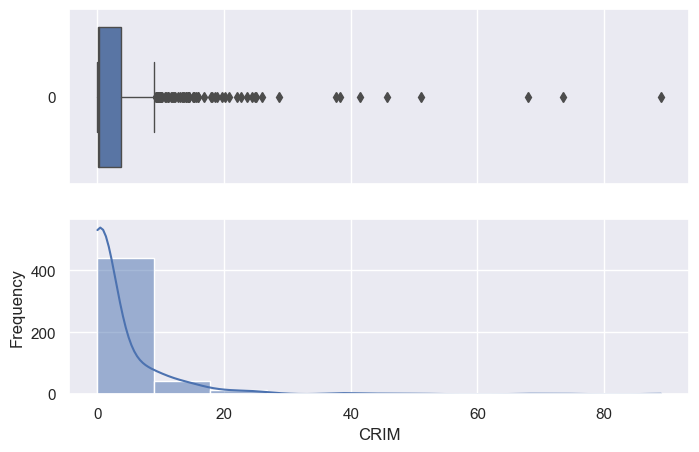

<Figure size 800x500 with 0 Axes>

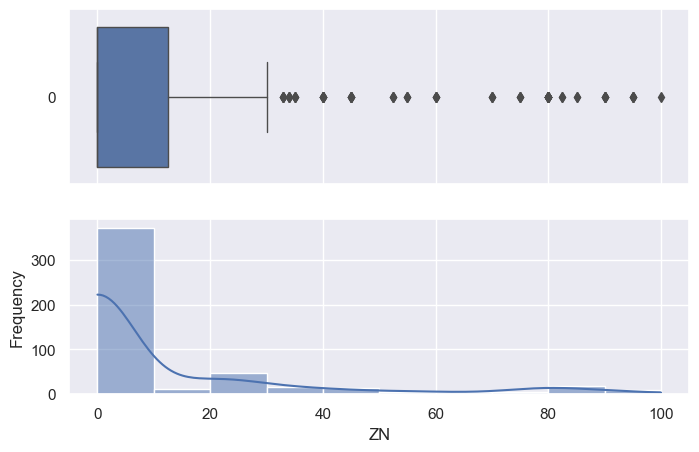

<Figure size 800x500 with 0 Axes>

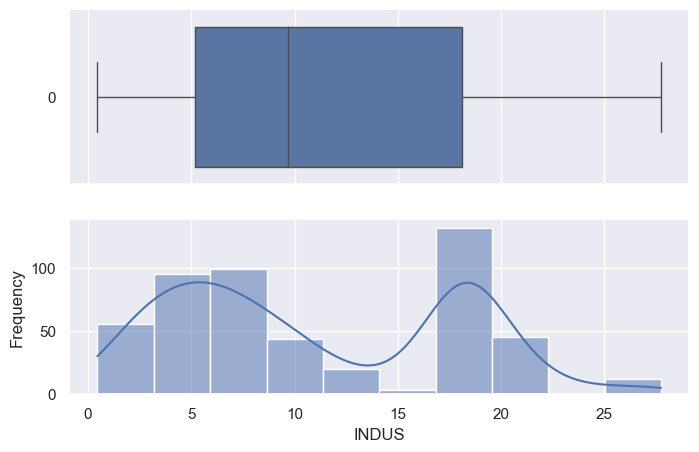

<Figure size 800x500 with 0 Axes>

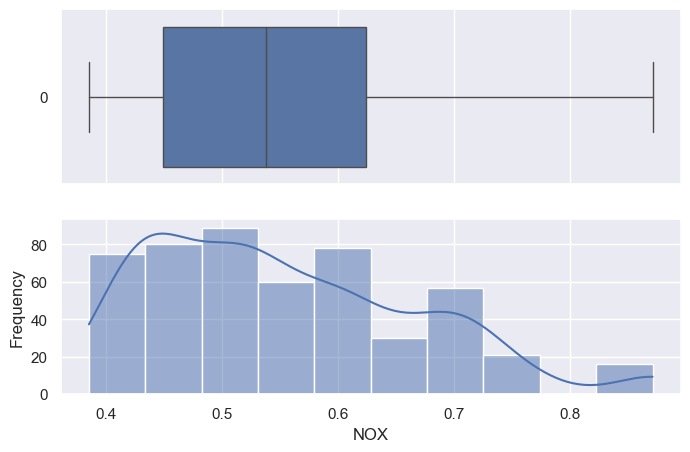

<Figure size 800x500 with 0 Axes>

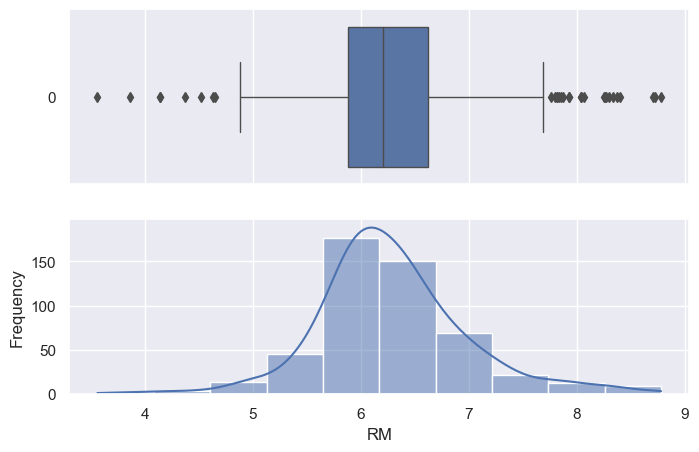

<Figure size 800x500 with 0 Axes>

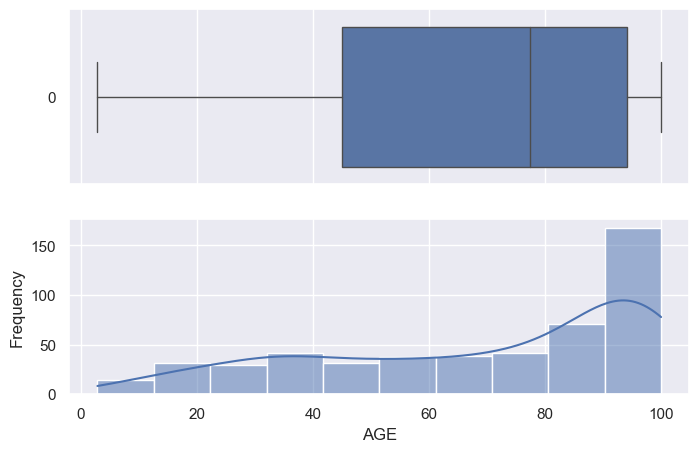

<Figure size 800x500 with 0 Axes>

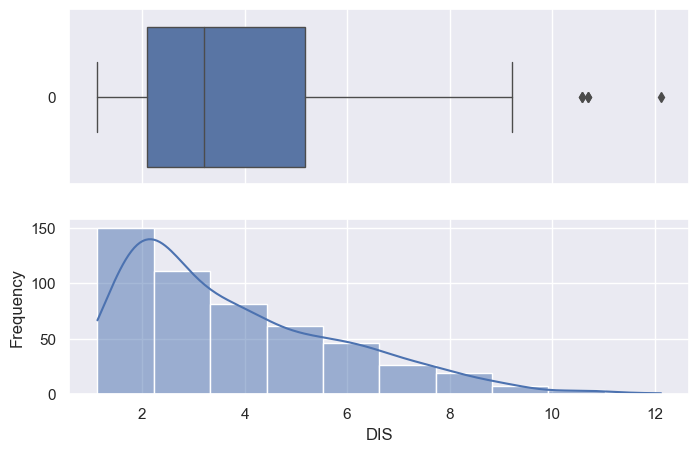

<Figure size 800x500 with 0 Axes>

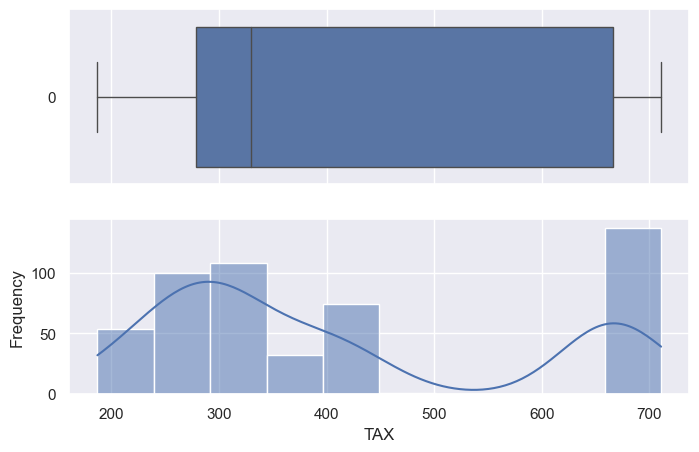

<Figure size 800x500 with 0 Axes>

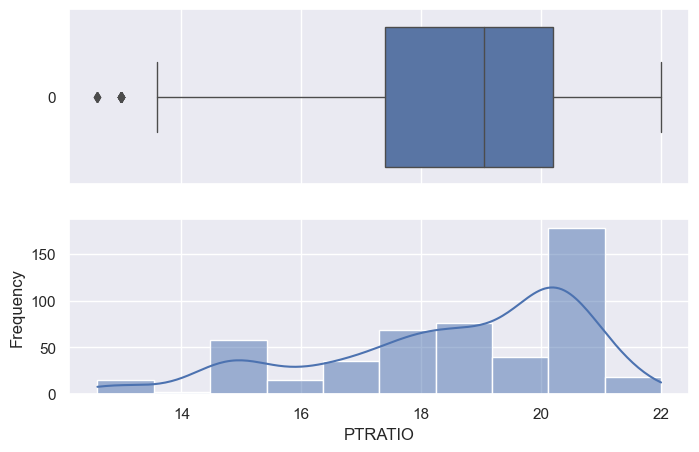

<Figure size 800x500 with 0 Axes>

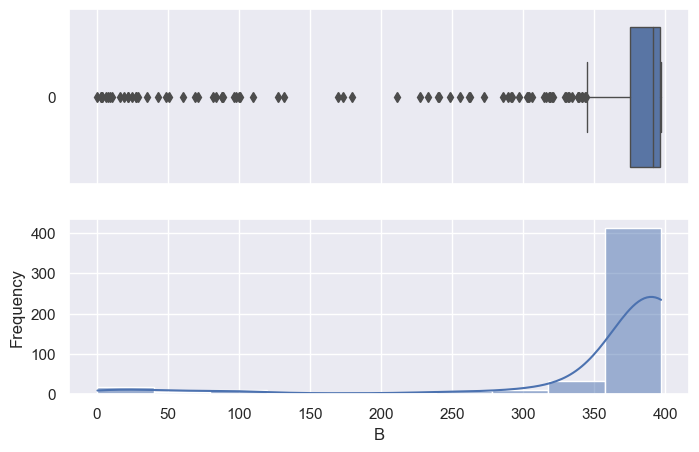

<Figure size 800x500 with 0 Axes>

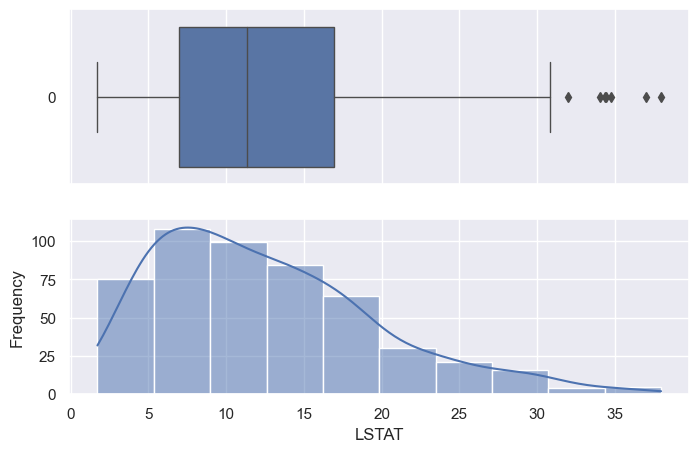

<Figure size 800x500 with 0 Axes>

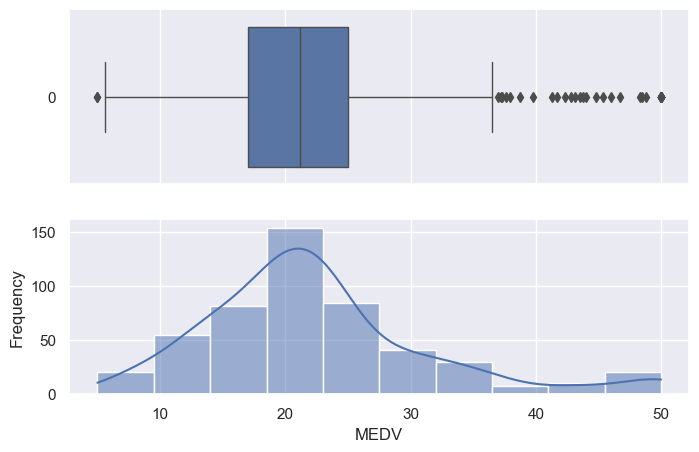

In [15]:
for i in df_housing[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_housing[i],  ax=ax_box , orient="h", linewidth= 1.0)
    sns.histplot(df_housing[i], ax=ax_hist , bins = 10,kde=True)

<div class="alert alert-info alert-info">

  Aparentemente ninguno de los atributos tiene una distribución normal y además tenemos outliers en los atributos **CRIM**, **ZN**,**RM**, **DIS**, **PTRATIO**, **B** y **LSTAT**, mientras que no existen en los atributos **INDUS**, **NOX**, **AGE** y **TAX**
    
  Comprobamos mediante shapiro si la impresión de que ninguna tiene distribución gaussiana, es correcta.
    
</div> 

In [16]:
from scipy.stats import shapiro

def distr_normal(df):
    normal = []
    for col in df.select_dtypes(include=['float64']).columns:
        p_valor = shapiro(df[col])[1]
        normal.append(p_valor > 0.05) 
    return normal
resultado = distr_normal(df_housing)
print(resultado)

[False, False, False, False, False, False, False, False, False, False, False, False]


<div class="alert alert-info alert-info"><b><h1>Escalado de características</h1></b>

Realizamos la estandarización de los atributos, en función de si existen o no outliers, utilizando **RobustScaler** para el primer caso y **MinMaxScaler** en el segundo. 
</div>

In [17]:
# Crear una instancia de RobustScaler
scaler = RobustScaler()

# Creamos la variable que contenga las etiquetas de las columnas (no normalizamos la variable objetivo MEDV)
feat_lb = ['CRIM', 'ZN','RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])


# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)

df_housing_trans.head().round(3)

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.070,1.44,0.497,0.286,-1.339,0.262,-0.638
1,-0.064,0.00,0.288,0.570,-0.446,0.262,-0.222
2,-0.064,0.00,1.323,0.570,-0.446,0.067,-0.733
3,-0.062,0.00,1.070,0.924,-0.125,0.153,-0.842
4,-0.052,0.00,1.272,0.924,-0.125,0.262,-0.603


In [18]:
# Actualizamos las nuevas columnas en el DataFrame original.

df_housing.update(df_housing_trans)

df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,-0.070,1.44,2.31,0,0.538,0.497,65.2,0.286,296.0,-1.339,...,-0.638,24.0,1,0,0,0,0,0,0,0
1,-0.064,0.00,7.07,0,0.469,0.288,78.9,0.570,242.0,-0.446,...,-0.222,21.6,0,1,0,0,0,0,0,0
2,-0.064,0.00,7.07,0,0.469,1.323,61.1,0.570,242.0,-0.446,...,-0.733,34.7,0,1,0,0,0,0,0,0
3,-0.062,0.00,2.18,0,0.458,1.070,45.8,0.924,222.0,-0.125,...,-0.842,33.4,0,0,1,0,0,0,0,0
4,-0.052,0.00,2.18,0,0.458,1.272,54.2,0.924,222.0,-0.125,...,-0.603,36.2,0,0,1,0,0,0,0,0


<div class="alert alert-info alert-info">
    
Aplicamos un escalado al resto de variables utilizando **MinMaxScaler**. 
    
</div>

In [19]:
# Crear una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Creamos la variable que contenga las etiquetas de las columnas
feat_lb = ['INDUS', 'NOX', 'AGE', 'TAX']

# Ajustar (fit) el scaler a los datos de entrenamiento
scaler.fit(df_housing[feat_lb])

# Transformar los datos de entrenamiento
transformed_train = scaler.transform(df_housing[feat_lb])


# Creamos un nuevo DataFrame
df_housing_trans = pd.DataFrame(transformed_train, columns=feat_lb)

df_housing_trans.head().round(3)

,INDUS,NOX,AGE,TAX
0,0.068,0.315,0.642,0.208
1,0.242,0.173,0.783,0.105
2,0.242,0.173,0.599,0.105
3,0.063,0.150,0.442,0.067
4,0.063,0.150,0.528,0.067


In [20]:
# Actualizamos las nuevas columnas en el DataFrame original.

df_housing.update(df_housing_trans)

df_housing.head().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8
0,-0.070,1.44,0.068,0,0.315,0.497,0.642,0.286,0.208,-1.339,...,-0.638,24.0,1,0,0,0,0,0,0,0
1,-0.064,0.00,0.242,0,0.173,0.288,0.783,0.570,0.105,-0.446,...,-0.222,21.6,0,1,0,0,0,0,0,0
2,-0.064,0.00,0.242,0,0.173,1.323,0.599,0.570,0.105,-0.446,...,-0.733,34.7,0,1,0,0,0,0,0,0
3,-0.062,0.00,0.063,0,0.150,1.070,0.442,0.924,0.067,-0.125,...,-0.842,33.4,0,0,1,0,0,0,0,0
4,-0.052,0.00,0.063,0,0.150,1.272,0.528,0.924,0.067,-0.125,...,-0.603,36.2,0,0,1,0,0,0,0,0


<Figure size 800x500 with 0 Axes>

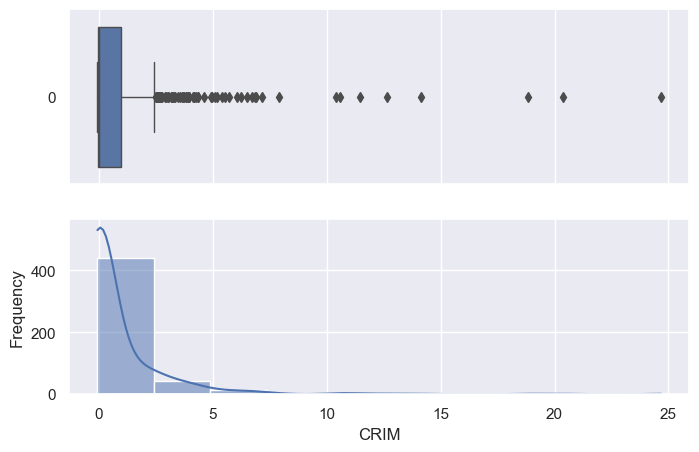

<Figure size 800x500 with 0 Axes>

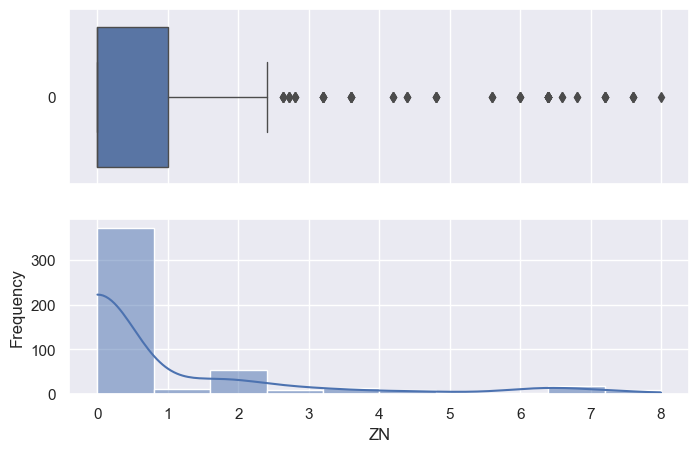

<Figure size 800x500 with 0 Axes>

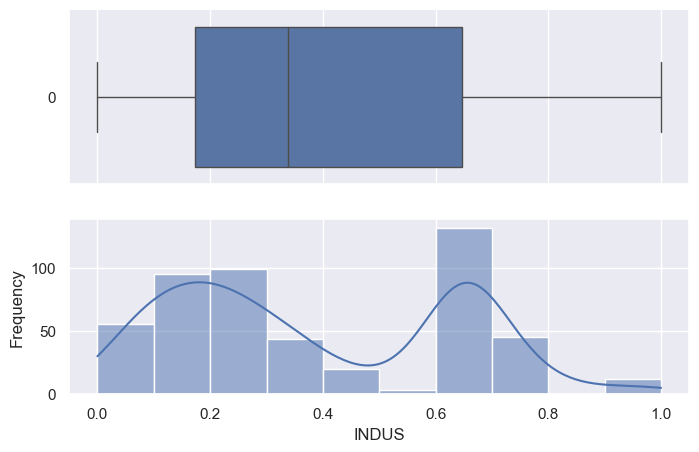

<Figure size 800x500 with 0 Axes>

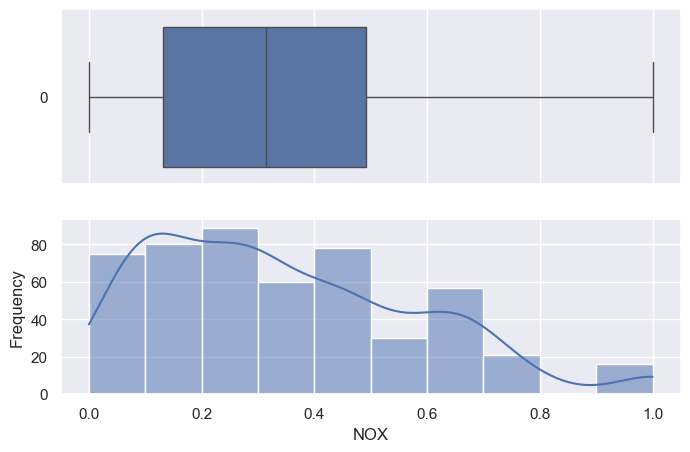

<Figure size 800x500 with 0 Axes>

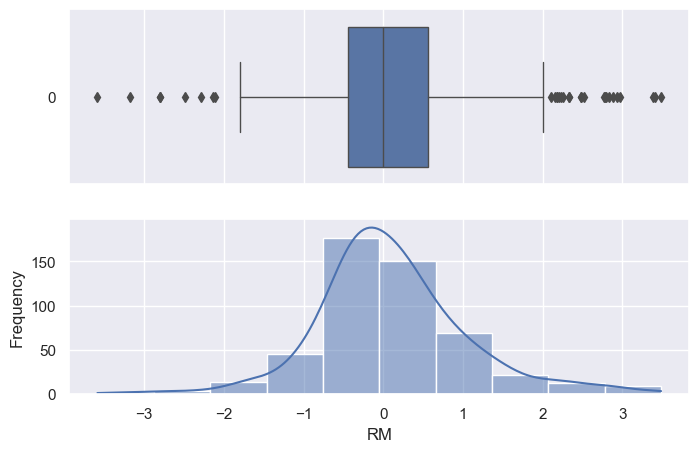

<Figure size 800x500 with 0 Axes>

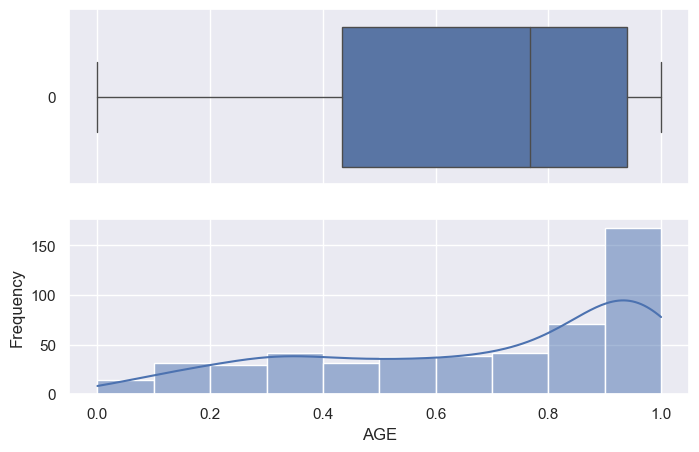

<Figure size 800x500 with 0 Axes>

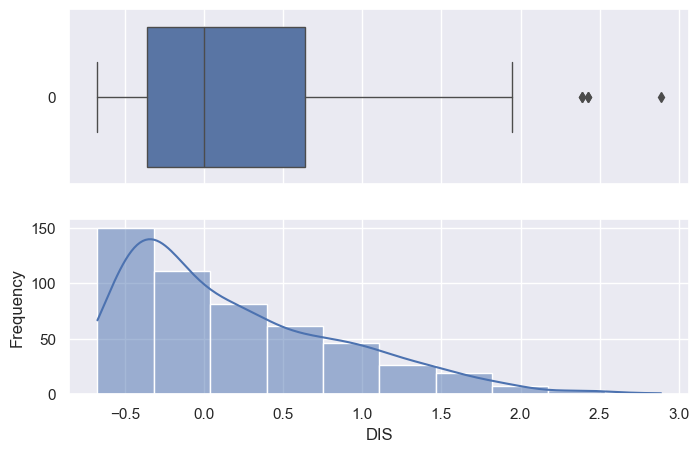

<Figure size 800x500 with 0 Axes>

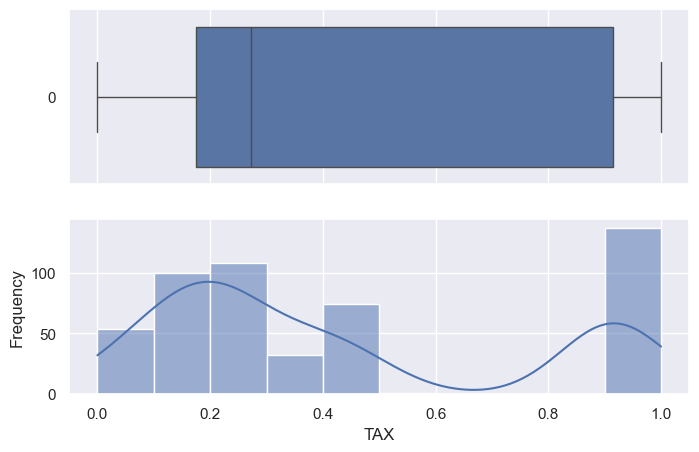

<Figure size 800x500 with 0 Axes>

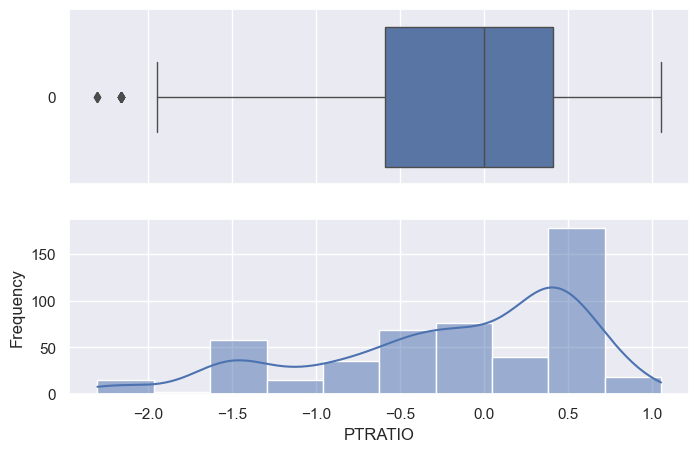

<Figure size 800x500 with 0 Axes>

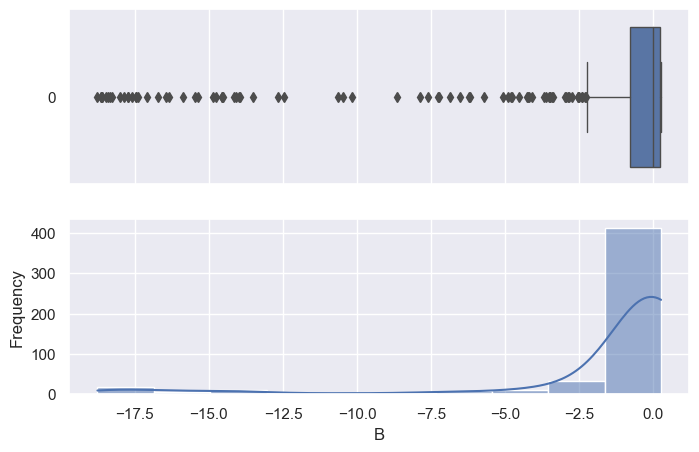

<Figure size 800x500 with 0 Axes>

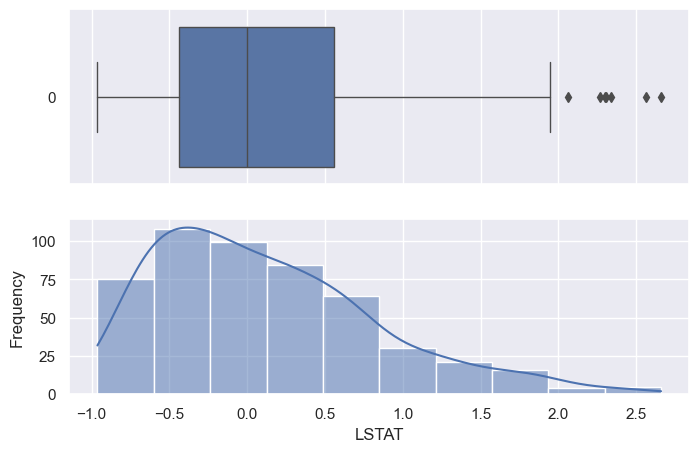

<Figure size 800x500 with 0 Axes>

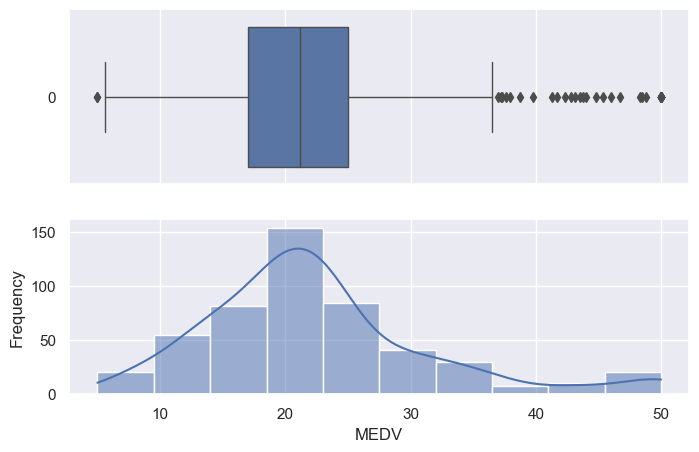

In [21]:
for i in df_housing[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV']]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_housing[i],  ax=ax_box , orient="h", linewidth= 1.0)
    sns.histplot(df_housing[i], ax=ax_hist , bins = 10,kde=True)

<div class="alert alert-info alert-info"><b><h1>Fase 6: Dividimos los datos en Train y Test</h1></b>
    
    
</div>

In [22]:
X = df_housing.drop(['MEDV'],axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(y_test))

404
102


<div class="alert alert-info alert-info"><b><h1>Aplicamos los modelos</h1></b>
    
    
</div>

<div class="alert alert-info alert-info"><b><h1>LinearRegression</h1></b>
    
    
</div>

In [23]:
# Creamos el modelo y lo entrenamoscon con los datos de entrenamiento.
l_reg = LinearRegression().fit(X_train, y_train)

In [24]:
# Obtenemos los datos de predicción basandonos en el X_test
y_pre_l_reg = l_reg.predict(X_test)

print('Precisión X_train: ',l_reg.score(X_train, y_train).round(5)*100)
print("Precisión X_test: ", l_reg.score(X_test, y_test).round(5)*100)

Precisión X_train:  76.283
Precisión X_test:  66.157


Text(0, 0.5, 'Predicción')

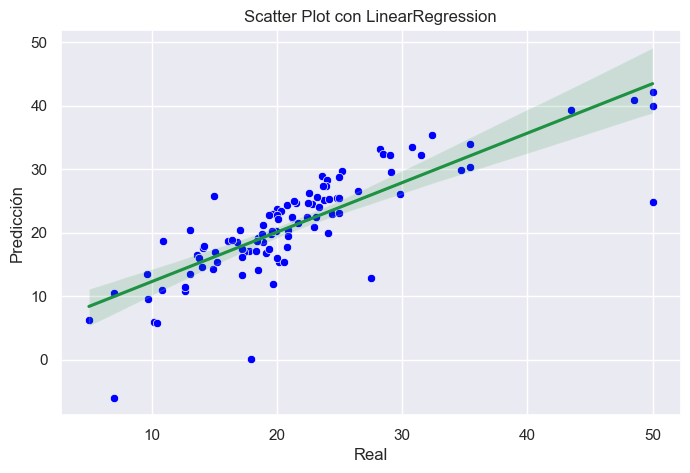

In [25]:
#Reflejamos en un gráfico lo valores de la predicción y los comparamos con los valores reales y_test
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pre_l_reg})

scatterplot = sns.scatterplot(x="Real", y="Predicción", data=resultados, color='blue')

# Agregar la línea de regresión
regplot = sns.regplot(x="Real", y="Predicción", data=resultados, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot.set_title("Scatter Plot con LinearRegression")
scatterplot.set_xlabel("Real")
scatterplot.set_ylabel("Predicción")

<div class="alert alert-info alert-info"><b><h1>RandomForestRegression</h1></b>
    
    
</div>

In [26]:
# Creamos el modelo y lo entrenamoscon con los datos de entrenamiento.
r_for = RandomForestRegressor(random_state = 3).fit(X_train, y_train)

In [27]:
# Obtenemos los datos de predicción basandonos en el X_test
y_pre_r_for = r_for.predict(X_test)

print('Precisión X_train: ',r_for.score(X_train, y_train).round(5)*100)
print("Precisión X_test: ", r_for.score(X_test, y_test).round(5)*100)

Precisión X_train:  97.843
Precisión X_test:  89.168


Text(0, 0.5, 'Predicción')

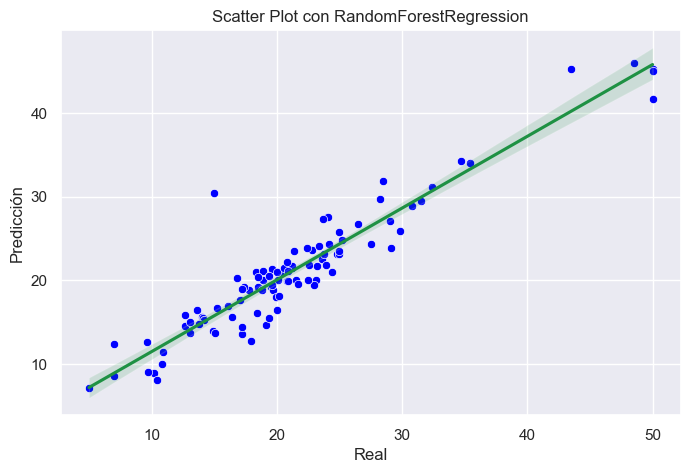

In [28]:
#Reflejamos en un gráfico lo valores de la predicción y los comparamos con los valores reales y_test
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pre_r_for})

scatterplot = sns.scatterplot(x="Real", y="Predicción", data=resultados, color='blue')

# Agregar la línea de regresión
regplot = sns.regplot(x="Real", y="Predicción", data=resultados, scatter=False, color='#1e9143')

# Personalizar el gráfico
scatterplot.set_title("Scatter Plot con RandomForestRegression")
scatterplot.set_xlabel("Real")
scatterplot.set_ylabel("Predicción")

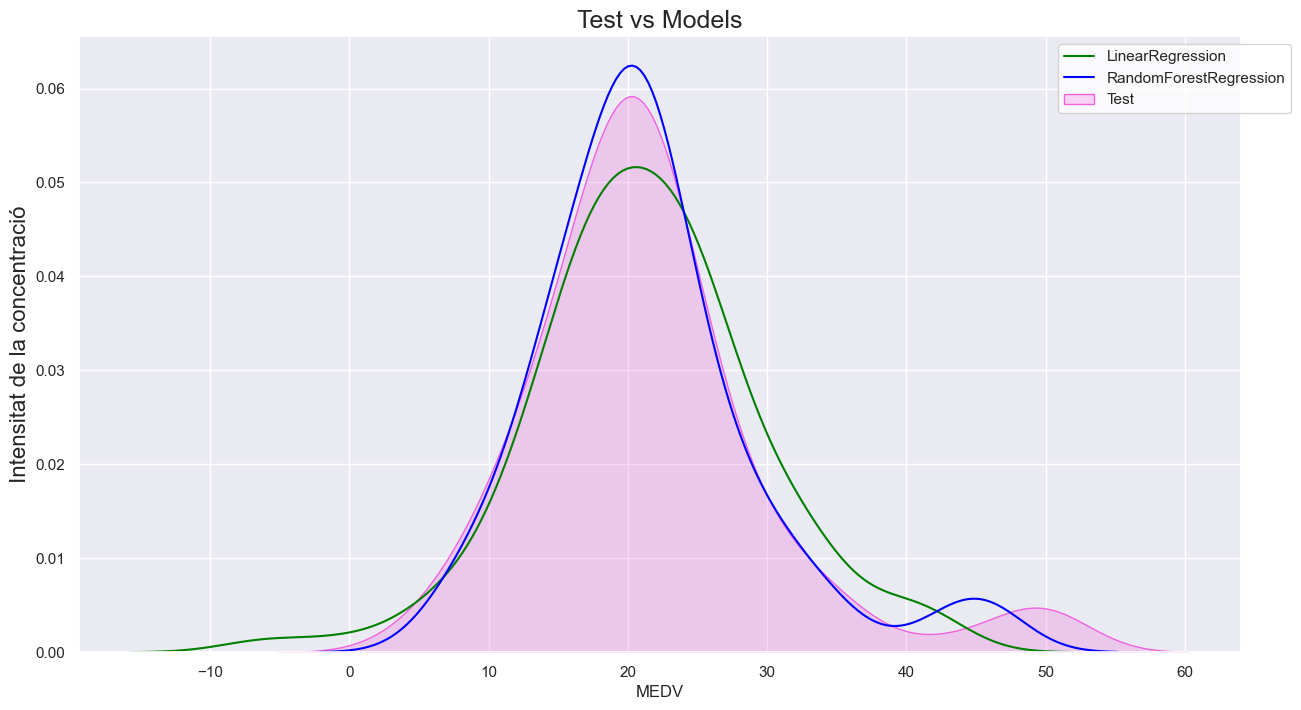

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style= "whitegrid")

sns.kdeplot(y_pre_l_reg , label='LinearRegression', color='green', fill=False)
sns.kdeplot(y_pre_r_for, label='RandomForestRegression', color='blue', fill=False)
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)
plt.title("Test vs Models", fontsize = 18)
plt.ylabel('Intensitat de la concentració', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [30]:
# Creamos un DataFrame para poder comparar las predicciones de los tres modelos.
prediccion = pd.DataFrame( data = [['LinearRegression', l_reg.score(X_train, y_train).round(5)*100, l_reg.score(X_test, y_test).round(5)*100
],
                                  ['RandomForestRegression', r_for.score(X_train, y_train).round(5)*100, r_for.score(X_test, y_test).round(5)*100
],
                                  ],
                                  columns = ['Model', 'X_train', 'X_test'])
prediccion.head().round(3)

,Model,X_train,X_test
0,LinearRegression,76.283,66.157
1,RandomForestRegression,97.843,89.168


<div class="alert alert-info alert-info">
 
Por lo que podemos ver de forma gráfica y numérica, parece que **RandomForestRegression** es el que  que mejor se ajusta a la distribucióon de los datos reales del _y_test_, aunque en la realización del ejercicio 2 lo podemos comprobar mejor de manéra numérica.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 2</h1></b>
    
Compara’ls en base al MSE i al R2.
    
</div>

In [31]:
# Cargamos la medida R2 para evaluar los modelos de regresión realizados.
r2_l_reg = r2_score(y_test,y_pre_l_reg)
r2_r_for = r2_score(y_test, y_pre_r_for)

In [32]:
# Cargamos la medida MSE para evaluar los modelos de regresión realizados.
mse_l_reg = mean_squared_error(y_test,y_pre_l_reg)
mse_r_for = mean_squared_error(y_test, y_pre_r_for)

In [33]:
# Creamos un DataFrame para poder comparar los resultados de ambas medidas.
resultados = pd.DataFrame( data = [['LinearRegression', r2_l_reg, mse_l_reg],
                                  ['RandomForestRegression', r2_r_for, mse_r_for],
                                  ],
                                  columns = ['Model', 'R2', 'MSE'])
resultados.head().round(3)

,Model,R2,MSE
0,LinearRegression,0.662,24.818
1,RandomForestRegression,0.892,7.943


<div class="alert alert-info alert-info">

El **MSE** nos indica cóomo de cerca está el modelo de los puntos reales y el **R2** nos mide la relacióon lineal entre X e Y. 
Según estos datos, odo indica que el modelo de mejor comportamiento es el **RandomForestRegression**.
 
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 3</h1></b>
    
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
    
</div>

<div class="alert alert-info alert-info">
    
Utilizaremos GridSearchCV, que es un técnica que nos permite evaluar de forma exhaustiva la mejor combinación de parámetros para un modelo.
    
</div>

In [34]:
# Obtenemos los parámetros por defecto del modelo LinearRegression
l_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [35]:
# Creamos un diccionario con los valores de los parámetros que nos interesan evaluar.
l_reg_param = {'fit_intercept':(True, False),
           'n_jobs':(-1, None, 1),
           'positive':(True, False)}
#creamos una instancia de GridSearchCV y la llamamos con los valores para evaluar nuestro modelo LinearRegression
l_reg_grid = GridSearchCV(LinearRegression(), l_reg_param,cv=5)

In [36]:
# Obtenemos los mejores parámetros entrenando la instancia con los datos de entrenamiento.
l_reg_grid_best= l_reg_grid.fit(X, y)
print("Los mejores parámetros para el LinearRegression son: \n", l_reg_grid.best_params_)

Los mejores parámetros para el LinearRegression son: 
 {'fit_intercept': True, 'n_jobs': -1, 'positive': False}


<div class="alert alert-info alert-info">
    
En el caso del modelo de LinearRegression, el único parámetro que varía respecto a los parámetros por defecto es 'n_jobs': -1 (que significa que se utilizarán todos los núcleos de la máquina)
    
</div>

In [37]:
# Aplicamos los mejores parámetros obtenidos al nuevo modelo.
l_reg_best = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pre_l_reg_best = l_reg_best.predict(X_test)

print('Precisión X_train mejores parámetros: ',l_reg_best.score(X_train, y_train).round(5)*100)
print("Precisión X_test mejores parámetros: ", l_reg_best.score(X_test, y_test).round(5)*100)

Precisión X_train mejores parámetros:  76.283
Precisión X_test mejores parámetros:  66.157


In [38]:
# Obtetenmos los valores de las medidas MSE y R2
mse_l_reg_best = mean_squared_error(y_test, y_pre_l_reg_best)
r2_l_reg_best = r2_score(y_test, y_pre_l_reg_best)

In [39]:
# Obtenemos los parámetros por defecto del modelo RandomForestRegression
r_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

In [40]:
# Creamos un diccionario con los valores de los parámetros que nos interesan evaluar.
r_for_param = {'n_estimators': [50, 100, 150],
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}
#creamos una instancia de GridSearchCV y la llamamos con los valores para evaluar nuestro modelo RandomForest
r_for_grid = GridSearchCV(RandomForestRegressor(random_state = 3), r_for_param, cv=5)

In [41]:
# Obtenemos los mejores parámetros entrenando la instancia con los datos de entrenamiento (tarda varios minutos).
r_for_grid_best= r_for_grid.fit(X, y)
print("Los mejores parámetros para el RandomForestRegression son: \n", r_for_grid_best.best_params_)

Los mejores parámetros para el RandomForestRegression son: 
 {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
# Aplicamos los valores obtenidos al modelo RandomForestRegression modificando los valores anteriores que no son los valores por defecto.
r_for_best = RandomForestRegressor(random_state = 3, max_features='auto', n_estimators = 100).fit(X_train, y_train)
y_pre_r_for_best = r_for_best.predict(X_test)

print('Precisión X_train mejores parámetros: ',r_for_best.score(X_train, y_train).round(5)*100)
print("Precisión X_test mejores parámetros : ", r_for_best.score(X_test, y_test).round(5)*100)

Precisión X_train mejores parámetros:  97.843
Precisión X_test mejores parámetros :  89.168


In [43]:
# Obtenemos los valores de las medidas MSE y R2
mse_r_for_best = mean_squared_error(y_test, y_pre_r_for_best)
r2_r_for_best = r2_score(y_test, y_pre_r_for_best)

In [44]:
# Actualizamos el DataFrame para poder comparar las predicciones de los tres modelos antes y despúes de la mejora.
prediccion = pd.DataFrame( data = [['LinearRegression', l_reg.score(X_train, y_train).round(5)*100, l_reg.score(X_test, y_test).round(5)*100
,l_reg_best.score(X_train, y_train).round(5)*100,l_reg_best.score(X_test, y_test).round(5)*100],
                                  ['RandomForestRegression', r_for.score(X_train, y_train).round(5)*100, r_for.score(X_test, y_test).round(5)*100
,r_for_best.score(X_train, y_train).round(5)*100,r_for_best.score(X_test, y_test).round(5)*100],
                                  ],
                                  columns = ['Model', 'X_train', 'X_test', 'X_train_bestPar', 'X_test_bestPar'])
prediccion.head().round(3)

,Model,X_train,X_test,X_train_bestPar,X_test_bestPar
0,LinearRegression,76.283,66.157,76.283,66.157
1,RandomForestRegression,97.843,89.168,97.843,89.168


In [45]:
# Actualizamos el DataFrame donde comparar los valores de los modelos antes y despúes de la mejora.
resultados = pd.DataFrame( data = [['LinearRegression', r2_l_reg, mse_l_reg,r2_l_reg_best,mse_l_reg_best],
                                  ['RandomForestRegression', r2_r_for, mse_r_for,r2_r_for_best,mse_r_for_best],
                                  ],
                                  columns = ['Model', 'R2', 'MSE','R2_best','MSE_best'])
resultados.head()

,Model,R2,MSE,R2_best,MSE_best
0,LinearRegression,0.661569,24.818443,0.661569,24.818443
1,RandomForestRegression,0.891684,7.943190,0.891684,7.943190


<div class="alert alert-info alert-info">
    
Podemos ver que los valores tanto para el modelo LinearRegression como para el modelo RandomForest son iguales.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 4</h1></b>
    
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).
    
</div>

<div class="alert alert-info alert-info">
    
Para elo utilizaremos la validación cruzada (cross_val_score), que es una función que nos permite ver la métrica de un modelo en diferentes divisiones de los datos. En nuestro caso al ser un problema de regresión, utilizaremos cmo _scoring_ los valores **neg_mean_squared_error** y **r2** para comparar los resultados. 

Creamos instancias de nuevos modelos para el cros validation.
    
</div>

In [46]:
#creamos las instancias de cross_val_score para scoring='r2'
cr_l_reg_best_r2 = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
cr_r_for_best_r2 = cross_val_score(RandomForestRegressor(random_state = 3), X, y, cv=5, scoring='r2')

In [47]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['r2_CrVal'] = [cr_l_reg_best_r2.mean(), cr_r_for_best_r2.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal
0,LinearRegression,0.662,24.818,0.662,24.818,0.325
1,RandomForestRegression,0.892,7.943,0.892,7.943,0.633


In [48]:
#creamos las instancias de cross_val_score para scoring='neg_mean_squared_error'
cr_l_reg_best_mse = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
cr_r_for_best_mse = cross_val_score(RandomForestRegressor(random_state = 3), X, y, cv=5, scoring='neg_mean_squared_error')

In [49]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['mse_CrVal'] = [cr_l_reg_best_mse.mean(), cr_r_for_best_mse.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal,mse_CrVal
0,LinearRegression,0.662,24.818,0.662,24.818,0.325,-37.889
1,RandomForestRegression,0.892,7.943,0.892,7.943,0.633,-20.940


<div class="alert alert-info alert-info">
    
Los valores obtenidos en la funcion de validación cruzada nos reafirman que el mejor modelo sigue siendo el Random Forest, ya que para R2 obtiene el valor de media más alto y para el mse también obtiene el valor más alto ( o valor absoluto del negativo más bajo).
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 5</h1></b>
    
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.
    
</div>

<div class="alert alert-info alert-info">

Repetimos todos los pasos realizados entre el ejercicio 1 y el 4, pero antes sacaremos la columna "RM" de los datos.
    
</div>

In [50]:
X = df_housing.drop(['RM','MEDV'],axis=1)
y = df_housing['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(y_test))

404
102


In [51]:
# LinearRegression
l_regnoRM = LinearRegression().fit(X_train, y_train)
y_pre_l_regnoRM = l_regnoRM.predict(X_test)


print('Precisión X_train sin RM: ',l_regnoRM.score(X_train, y_train).round(5)*100)
print("Precisión X_test sin RM: ", l_regnoRM.score(X_test, y_test).round(5)*100)

Precisión X_train sin RM:  71.069
Precisión X_test sin RM:  68.684


In [52]:
# RandomForestRegression
r_fornoRM = RandomForestRegressor(random_state = 3).fit(X_train, y_train)
y_pre_r_fornoRM = r_fornoRM.predict(X_test)

print('Precisión X_train sin RM: ',r_fornoRM.score(X_train, y_train).round(5)*100)
print("Precisión X_test sin RM: ", r_fornoRM.score(X_test, y_test).round(5)*100)

Precisión X_train sin RM:  97.489
Precisión X_test sin RM:  80.861


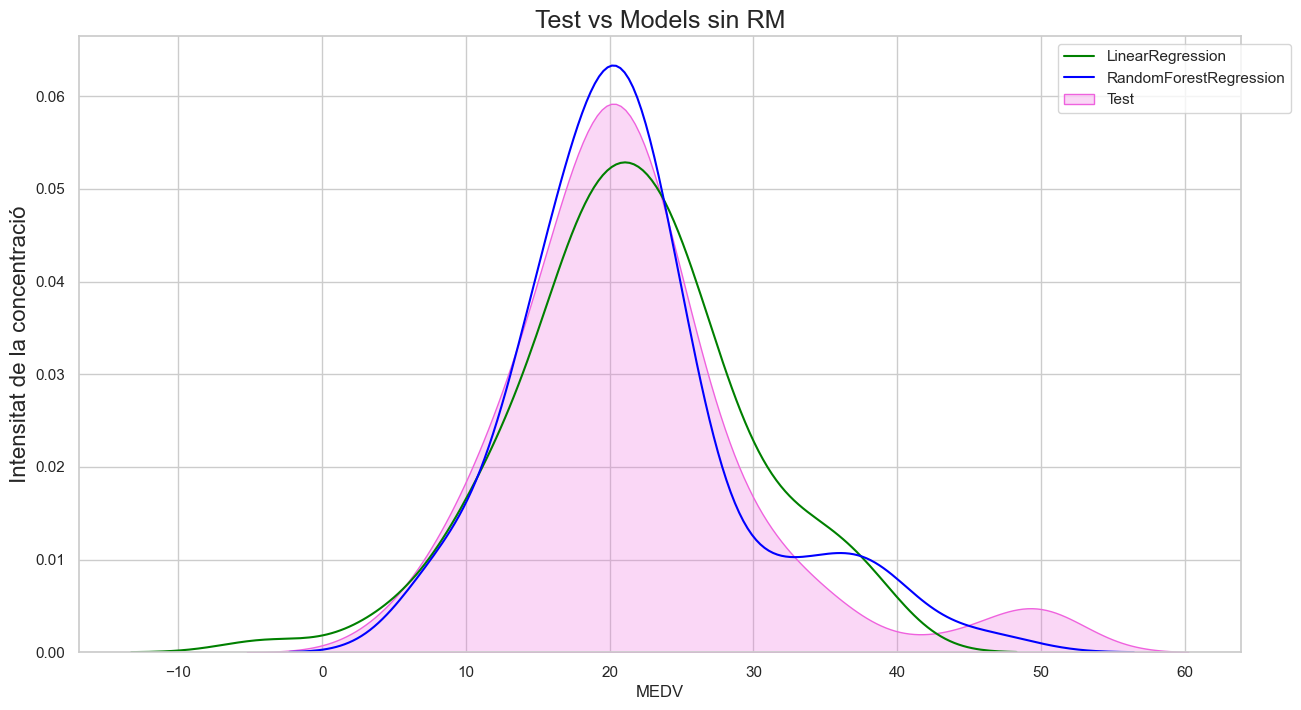

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(style= "whitegrid")

sns.kdeplot(y_pre_l_regnoRM , label='LinearRegression', color='green', fill=False)
sns.kdeplot(y_pre_r_fornoRM, label='RandomForestRegression', color='blue', fill=False)
sns.kdeplot(y_test, label='Test', color='#EF62DE', fill=True)
plt.title("Test vs Models sin RM", fontsize = 18)
plt.ylabel('Intensitat de la concentració', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

In [54]:
# Cargamos la medida R2 para evaluar los modelos de regresión realizados.
r2_l_regnoRM = r2_score(y_test,y_pre_l_regnoRM)
r2_r_fornoRM = r2_score(y_test, y_pre_r_fornoRM)

In [55]:
# Cargamos la medida MSE para evaluar los modelos de regresión realizados.
mse_l_regnoRM = mean_squared_error(y_test,y_pre_l_regnoRM)
mse_r_fornoRM = mean_squared_error(y_test, y_pre_r_fornoRM)

In [68]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['R2noRM'] = [r2_l_regnoRM, r2_r_fornoRM]
resultados['MSEnoRM'] = [mse_l_regnoRM, mse_r_fornoRM]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal,mse_CrVal,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best,r2_CrValnoRM,mse_CrValnoRM
0,LinearRegression,0.662,24.818,0.662,24.818,0.325,-37.889,0.687,22.965,0.687,0.796,0.476,-31.232
1,RandomForestRegression,0.892,7.943,0.892,7.943,0.633,-20.940,0.809,14.036,22.965,14.971,0.581,-24.524


In [57]:
# Mediante GridSearchCV intentamos mejorar nuestro LinearRegression
l_regnoRM_grid = GridSearchCV(LinearRegression(), l_reg_param)
l_regnoRM_grid_best= l_regnoRM_grid.fit(X, y)
print("Los mejores parámetros para el LinearRegression son: \n", l_regnoRM_grid.best_params_)

Los mejores parámetros para el LinearRegression son: 
 {'fit_intercept': True, 'n_jobs': -1, 'positive': False}


In [58]:
l_regnoRM_best = LinearRegression(n_jobs=-1).fit(X_train, y_train)
y_pre_l_regnoRM_best = l_regnoRM_best.predict(X_test)

print('Precisión X_train sin RM mejores parámetros: ',l_regnoRM_best.score(X_train, y_train).round(5)*100)
print("Precisión X_test sin RM mejores parámetros: ", l_regnoRM_best.score(X_test, y_test).round(5)*100)

Precisión X_train sin RM mejores parámetros:  71.069
Precisión X_test sin RM mejores parámetros:  68.684


In [59]:
mse_l_regnoRM_best = mean_squared_error(y_test, y_pre_l_regnoRM_best)
r2_l_regnoRM_best = r2_score(y_test, y_pre_l_regnoRM_best)

In [60]:
# Mediante GridSearchCV intentamos mejorar nuestro RandomForest (tarda varios minutos).
r_fornoRM_grid = GridSearchCV(RandomForestRegressor(random_state = 3), r_for_param)
r_fornoRM_grid_best= r_fornoRM_grid.fit(X, y)
print("Los mejores parámetros para el RandomForestRegression son: \n", r_fornoRM_grid_best.best_params_)

Los mejores parámetros para el RandomForestRegression son: 
 {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [61]:
r_fornoRM_best = RandomForestRegressor(random_state = 3,max_depth=10, max_features='auto',min_samples_leaf=1,min_samples_split=5, n_estimators = 50).fit(X_train, y_train)
y_pre_r_fornoRM_best = r_fornoRM_best.predict(X_test)


print('Precisión X_train sin RM mejores parámetros: ',r_fornoRM_best.score(X_train, y_train).round(5)*100)
print("Precisión X_test sin RM mejores parámetros: ", r_fornoRM_best.score(X_test, y_test).round(5)*100)

Precisión X_train sin RM mejores parámetros:  95.732
Precisión X_test sin RM mejores parámetros:  79.585


In [62]:
mse_r_fornoRM_best = mean_squared_error(y_test, y_pre_r_fornoRM_best)
r2_r_fornoRM_best = r2_score(y_test, y_pre_r_fornoRM_best)

In [69]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['R2noRM_best'] = [r2_l_regnoRM_best, r2_r_fornoRM_best]
resultados['MSEnoRM_best'] = [mse_l_regnoRM_best, mse_r_fornoRM_best]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal,mse_CrVal,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best,r2_CrValnoRM,mse_CrValnoRM
0,LinearRegression,0.662,24.818,0.662,24.818,0.325,-37.889,0.687,22.965,0.687,22.965,0.476,-31.232
1,RandomForestRegression,0.892,7.943,0.892,7.943,0.633,-20.940,0.809,14.036,0.796,14.971,0.581,-24.524


In [64]:
#creamos las instancias de cross_val_score para scoring='r2'
cr_l_regnoRM_best_r2 = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
cr_r_fornoRM_best_r2 = cross_val_score(RandomForestRegressor(random_state = 3), X, y, cv=5, scoring='r2')

In [65]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['r2_CrValnoRM'] = [cr_l_regnoRM_best_r2.mean(), cr_r_fornoRM_best_r2.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal,mse_CrVal,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best,r2_CrValnoRM
0,LinearRegression,0.662,24.818,0.662,24.818,0.325,-37.889,0.687,0.687,0.687,0.796,0.476
1,RandomForestRegression,0.892,7.943,0.892,7.943,0.633,-20.940,22.965,14.036,22.965,14.971,0.581


In [66]:
#creamos las instancias de cross_val_score para scoring='neg_mean_squared_error'
cr_l_regnoRM_best_mse = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
cr_r_fornoRM_best_mse = cross_val_score(RandomForestRegressor(random_state = 3), X, y, cv=5, scoring='neg_mean_squared_error')

In [70]:
# Añadimos las medias de los valores obtenidos a nuestro DataFrame Resultados
resultados['mse_CrValnoRM'] = [cr_l_regnoRM_best_mse.mean(), cr_r_fornoRM_best_mse.mean()]
resultados.head().round(3)

,Model,R2,MSE,R2_best,MSE_best,r2_CrVal,mse_CrVal,R2noRM,MSEnoRM,R2noRM_best,MSEnoRM_best,r2_CrValnoRM,mse_CrValnoRM
0,LinearRegression,0.662,24.818,0.662,24.818,0.325,-37.889,0.687,22.965,0.687,22.965,0.476,-31.232
1,RandomForestRegression,0.892,7.943,0.892,7.943,0.633,-20.940,0.809,14.036,0.796,14.971,0.581,-24.524


<div class="alert alert-info alert-info">
    
Como conclusión final al ejercicio, podemos afirmar que el modelo **RandomForestRegression** es el que tiene mejor comportamiento para este caso, teniendo en cuenta los valores de **R2** (que nos indica que puede explicar el 89.2% de la viarbilidad de los datos) frente a los valores obtenidos por **LinearRegression** que se queda en el 66.2%. También los valores de **MSE** son mejores en el **RandomForestRegression** con mucha diferencia respecto al **LinearRegression**.

Si observamos los valores de **R2_best** y **MSE_best** podemos afirmar que los modelos han alcanzado su mejor rendimiento 
con los valores por defecto.

Si analizamos los datos obtenidos de **R2** y **MSE** en la validazión cruzada, podemos ver que se mantiene el **RandomForestRegression** cómo mejor modelo, aunque en ambos baja bastante su rendimiento. Esto puede ser debido a que el tamaño de los registros es muy limitado y en la validación cruzada este tamaño disminuye más por lo que la estimación puede ser peor.  En el caso del **MSE** se obtienen valores negativos al utiilizarse para el _scoring_ el **neg_mean_squared_error**
    
Los resultados en ausencia del atributo **RM** empeoran los resultados del **RandomForestRegression** disminuyendo el **R2**
al 80.9% y aumentando el **MSE** hasta el 14.03 lo que significa que con la eliminaciónde **RM** (que tiene una correlación fuerte con el valor target **MEDV**) estamos quitando información importante en la predicción del objetivo. Por otro lado el modelo **LinearRegression** mejora ligeramente sus valores **R2** y **MSE** por lo que es posible que el atributo **RM** estuviera introduciendo sobreajuste al modelo. 
    
No se observan mejoras significativas al buscar los mejores parámetros, por lo que podemos afirmar lo mismo que en el caso anterior.
    
En el análisis de  **R2** y **MSE** en la validación cruzada para la ausencia de latributo **RM** tenemos la misma tendencia observada anteriormente.
    
    
    
</div>